In [1]:
import sys
import os

# Check if running in Google Colab
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')

    # Set working directory if in Colab
    notebook_path = '/content/drive/MyDrive/Avantikav/ItaruDataScience/Feature_selection_breast_cancer/Breast_cancer_project'
    os.chdir(notebook_path)
    print("Working directory set to:", os.getcwd())

    # Download feature-engine
    !pip install feature-engine
else:
    print("Running in a local environment. Set your working directory manually.")

Running in a local environment. Set your working directory manually.


In [2]:
# Import pandas
import pandas as pd

In [3]:
# Import the dataset
df = pd.read_csv('wdbc.data')

In [4]:
# Check the head of the data
df.head()


,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [5]:
# Check the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

In [6]:
# Without the label, it's hard to see what is happeing in this dataset. So I'm goint to import the label of the dataset
# It doesn't seem the label file is csv file. So firts, load it as a plain file.
with open('wdbc.names', 'r') as file:
    plaindata = file.read()
print(plaindata)

1. Title: Wisconsin Diagnostic Breast Cancer (WDBC)

2. Source Information

a) Creators: 

	Dr. William H. Wolberg, General Surgery Dept., University of
	Wisconsin,  Clinical Sciences Center, Madison, WI 53792
	wolberg@eagle.surgery.wisc.edu

	W. Nick Street, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	street@cs.wisc.edu  608-262-6619

	Olvi L. Mangasarian, Computer Sciences Dept., University of
	Wisconsin, 1210 West Dayton St., Madison, WI 53706
	olvi@cs.wisc.edu 

b) Donor: Nick Street

c) Date: November 1995

3. Past Usage:

first usage:

	W.N. Street, W.H. Wolberg and O.L. Mangasarian 
	Nuclear feature extraction for breast tumor diagnosis.
	IS&T/SPIE 1993 International Symposium on Electronic Imaging: Science
	and Technology, volume 1905, pages 861-870, San Jose, CA, 1993.

OR literature:

	O.L. Mangasarian, W.N. Street and W.H. Wolberg. 
	Breast cancer diagnosis and prognosis via linear programming. 
	Operations Research, 43(4), pag

In [7]:
# Create the feature names according to the description
# Define the base feature name
features = ['radius', 'texture', 'perimeter', 'area', 'smoothness', 'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal dimension']

# Check the size of the list so that I don't miss any features
len(features)

10

In [8]:
# Define the full feature names
feature_names = ['ID', 'Diagnostic'] + [f'{feature}_mean' for feature in features] + [f'{feature}_SE' for feature in features] + [f'{feature}_worst' for feature in features]

# Check the size of the feature
len(feature_names)


32

In [9]:
# The dataset dosen't have the column name with the feature_names I've created.
df = pd.read_csv('wdbc.data', header=None, names=feature_names)

In [10]:
# Check the head of the dataset
df.head()

,ID,Diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
# Check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnostic               569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal dimension_mean   569 non-null    float64
 12  radius_SE                569 non-null    float64
 13  texture_SE               569 non-null    float64
 14  perimeter_SE             5

In [12]:
# Convert 'Diagonostic' column to binary
df['Diagnostic_num'] = df['Diagnostic'].map({'M':1, 'B':0})

# Check the head of df
df.head()

,ID,Diagnostic,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal dimension_worst,Diagnostic_num
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [13]:
# Count the value of the num_column to verfy whether the conversion worked well or not

df['Diagnostic_num'].value_counts()

Diagnostic_num
0    357
1    212
Name: count, dtype: int64

In [14]:
# ID isn't important. So drop it
df.drop('ID', axis=1, inplace =True)

In [15]:
# Check the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnostic               569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal dimension_mean   569 non-null    float64
 11  radius_SE                569 non-null    float64
 12  texture_SE               569 non-null    float64
 13  perimeter_SE             569 non-null    float64
 14  area_SE                  5

In [16]:
#Judging form the website and .info, the dataset seems to be clean. So I'm going to split the data.

In [17]:
# Split the dataset into features and target
X = df.drop(['Diagnostic_num', 'Diagnostic'], axis=1)

y = df['Diagnostic_num']

In [18]:
# Check X
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   radius_mean              569 non-null    float64
 1   texture_mean             569 non-null    float64
 2   perimeter_mean           569 non-null    float64
 3   area_mean                569 non-null    float64
 4   smoothness_mean          569 non-null    float64
 5   compactness_mean         569 non-null    float64
 6   concavity_mean           569 non-null    float64
 7   concave_points_mean      569 non-null    float64
 8   symmetry_mean            569 non-null    float64
 9   fractal dimension_mean   569 non-null    float64
 10  radius_SE                569 non-null    float64
 11  texture_SE               569 non-null    float64
 12  perimeter_SE             569 non-null    float64
 13  area_SE                  569 non-null    float64
 14  smoothness_SE            5

In [19]:
# Check y
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 569 entries, 0 to 568
Series name: Diagnostic_num
Non-Null Count  Dtype
--------------  -----
569 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [20]:
# Change the value back

In [21]:
#Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train_t, X_val, y_train_t, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

In [22]:
print(y_train_t.shape)

(364,)


In [23]:
# Apply to PCA to reduce 2 principle componets
# Import necessary packages
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize the scaler
scaler = StandardScaler()

#Fit the scaler on the training data
X_train_t_scaled = scaler.fit_transform(X_train_t)
X_val_scaled = scaler.transform(X_val)

#Check whether the data is normalized
print(f'mean is {np.mean(X_train_t_scaled)}')
print(f'std is {np.std(X_train_t_scaled)}')

mean is 2.4237835995479608e-17
std is 1.0


In [24]:
y_train_t.shape

(364,)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     364 non-null    float64
 1   PC2     364 non-null    float64
dtypes: float64(2)
memory usage: 5.8 KB


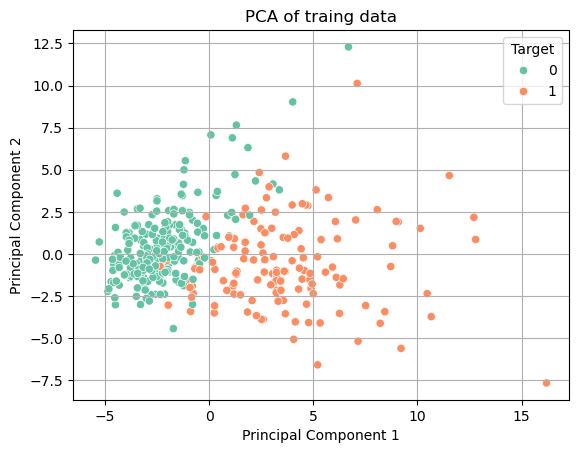

In [25]:
# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA
X_train_t_pca = pca.fit_transform(X_train_t_scaled)

# Make a DataFrame to plot the graph
pca_df = pd.DataFrame(X_train_t_pca, columns=['PC1', 'PC2'])
pca_df.info()
pca_df['Target'] = y_train_t.to_list()                        #   Everytime, I should assign the list

# Create a plot
sns.scatterplot(x='PC1', y='PC2', hue='Target', data=pca_df, palette='Set2')

# Add level
plt.title('PCA of traing data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.grid(True)
plt.show()

In [26]:
print(pca_df.tail())
print(pca_df.info())

          PC1       PC2  Target
359  3.780104  0.942312       1
360 -2.609691  1.525069       0
361 -3.425292 -1.142808       0
362  5.204142 -0.168186       1
363 -3.988079 -0.423162       0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     364 non-null    float64
 1   PC2     364 non-null    float64
 2   Target  364 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 8.7 KB
None


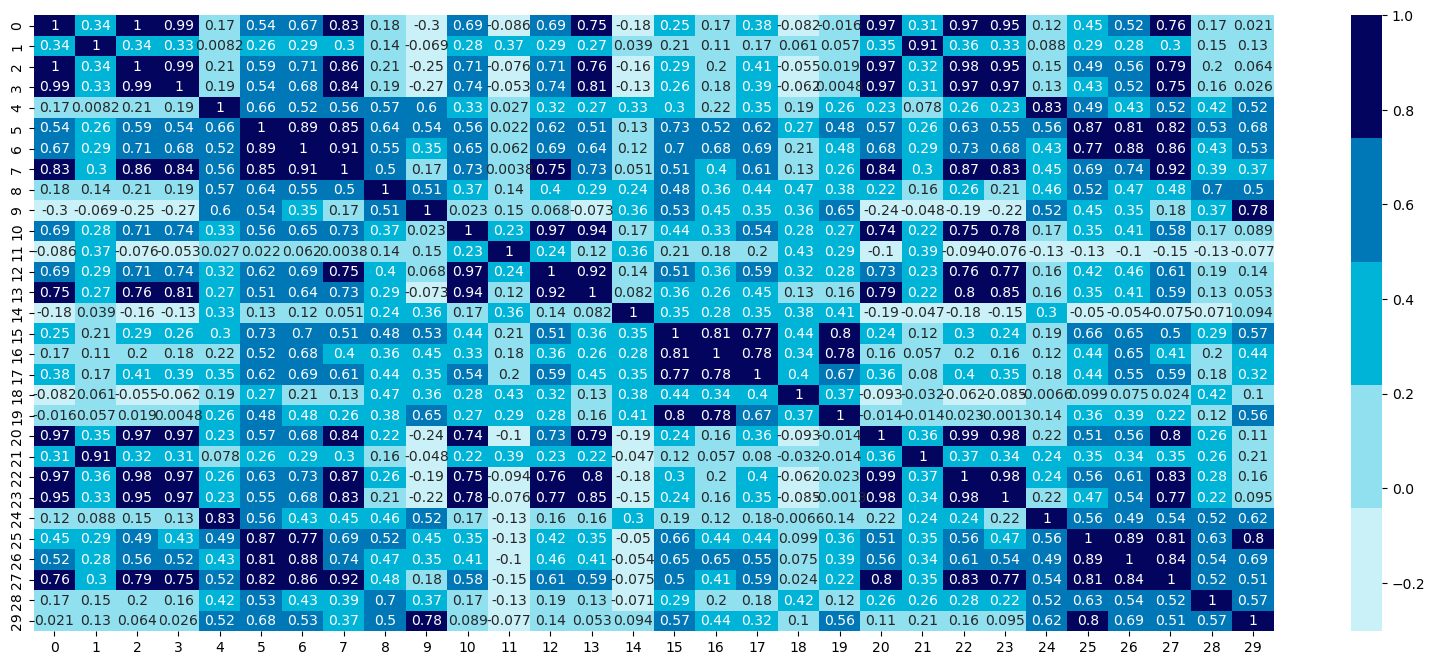

In [27]:
# Calculate the Person's correlation
corrmat = pd.DataFrame(X_train_t_scaled).corr(method='pearson')

# Define the custom color palette (coolors.co)
custom_palette = ['#caf0f8', '#90e0ef', '#00b4d8', '#0077b6', '#03045e']

# visualize correlation heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.color_palette(custom_palette, as_cmap=True)
sns.heatmap(corrmat, annot=True, cmap=custom_palette )
plt.show()

In [28]:
# Import libraries
from feature_engine.selection import SmartCorrelatedSelection
from sklearn.ensemble import RandomForestClassifier

# Pick the best features amoug correlated features using random forest
sel_c_r = SmartCorrelatedSelection(
    method='pearson',
    threshold=0.7,
    selection_method='model_performance',
estimator=RandomForestClassifier(n_estimators=100, random_state=10),   #   I don't know how to tune hyper parameters.
    scoring='f1',                                                    #   My book used ROC, but I use f1
    cv=3)
sel_c_r.fit(X_train_t_scaled, y_train_t)
X_train_t_c_r = sel_c_r.transform(X_train_t_scaled)
X_val_c_r = sel_c_r.transform(X_val_scaled)


In [29]:
X_train_t_c_r.head()

,x6,x8,x10,x11,x14,x17,x18,x21,x22,x24,x29
0,-0.613066,-0.330760,-0.533089,-0.238152,-0.554930,-0.546203,-0.346104,-0.176779,-0.463532,-0.130283,-0.273625
1,0.093250,2.024710,-0.004091,-0.241620,0.976287,1.545445,0.603667,-1.594595,-1.124720,2.474738,2.379162
2,0.689405,0.429414,0.244214,-0.774169,-0.231976,-0.126224,-0.765965,0.021446,0.492772,0.961871,-0.215404
3,0.037746,0.482948,1.045715,0.190176,-0.849919,0.282915,-0.008779,-0.023911,1.167571,-1.269182,-1.067386
4,-0.659743,-0.273658,-0.866645,-0.413645,-0.609494,-0.481626,-0.641561,-0.647145,-0.809620,-0.550996,-0.938263


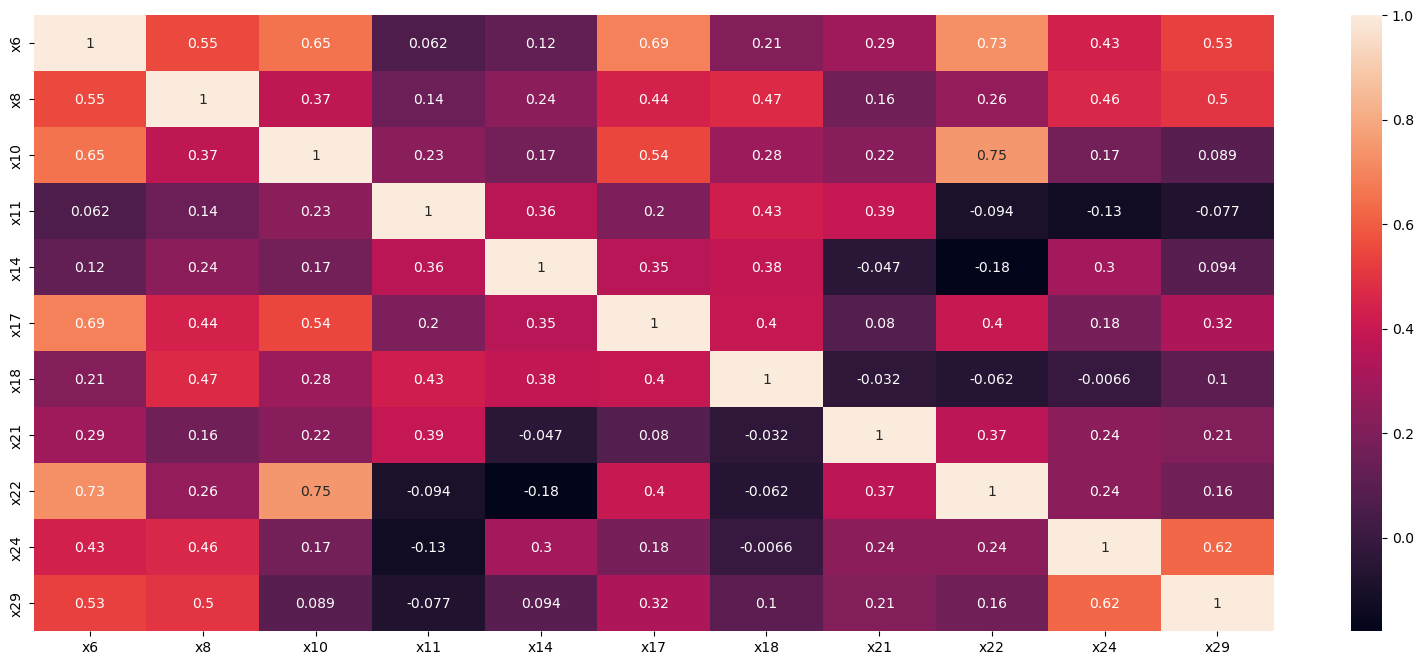

In [30]:
# Calculate the Person's correlation
corrmat = X_train_t_c_r.corr(method='pearson')
# visualize correlation heatmap
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
sns.heatmap(corrmat, annot=True )
plt.show()

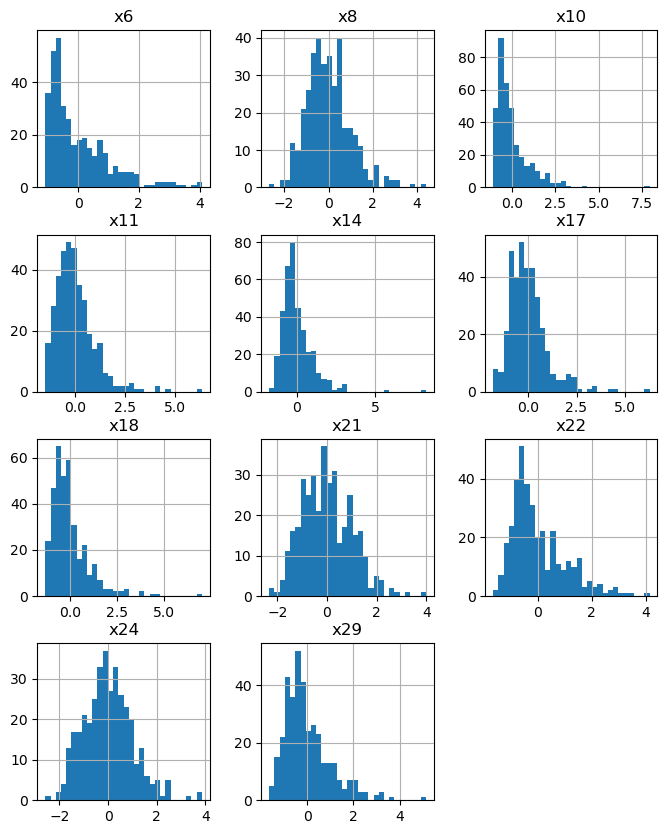

In [31]:
X_train_t_c_r.hist(bins=30, figsize=(8,10))
plt.show()

Pure RFE With sklearn (I wasn't able to fix and dissect the problems with RFE with featture engine.)

How many trees should I use for feature selection?

In [32]:
# Import necessary libralies
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score


# Define the model to execute RFE
model =  RandomForestClassifier(n_estimators=100, random_state=10)   

# Initialize RFE
rfe= RFE(estimator = model)

# Setup GridsearchCV for hyperparameter tuning -- for number of features to select
param_grid ={'n_features_to_select': range(1, X_train_t_scaled .shape[1]+1)}     # try 1 to all features

# Define a scorer for GridsearchCV
scorer = make_scorer(f1_score)

# Perform the grid search
grid_search = GridSearchCV(estimator=rfe, param_grid=param_grid, scoring=scorer, cv=3)
grid_search.fit(X_train_t_scaled , y_train_t)
# get the number of features from the best model
best_n_features =  grid_search.best_params_['n_features_to_select']
print(f'Best number of features: {best_n_features}') 

Best number of features: 17


In [33]:
# Get the selecte feature
best_rfe = grid_search.best_estimator_
selected_features = X_train.columns[best_rfe.support_]
print(f'Selected features: {selected_features}')

Selected features: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave_points_mean', 'area_SE',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave_points_worst', 'symmetry_worst'],
      dtype='object')


In [34]:
# transform the train set and validation set
X_train_t_rfe = best_rfe.transform(X_train_t_scaled)
X_val_rfe = best_rfe.transform(X_val_scaled)

Try RFE woth selecte feature by Correration and rundomforest based feature selection.

In [35]:
X_train_t_c_r.shape

(364, 11)

In [36]:
# Setup GridsearchCV for hyperparameter tuning -- for number of features to select
param_grid_cor ={'n_features_to_select': range(1, X_train_t_c_r.shape[1]+1)}     # try 1 to all features


# Perform the grid search
grid_search_cor = GridSearchCV(estimator=rfe, param_grid=param_grid_cor, scoring=scorer, cv=3)
grid_search_cor.fit(X_train_t_c_r , y_train_t)
# get the number of features from the best model
best_n_features_cor =  grid_search_cor.best_params_['n_features_to_select']
print(f'Best number of features: {best_n_features_cor}') 

Best number of features: 9


In [37]:
# Get the selecte feature
best_rfe_cor = grid_search_cor.best_estimator_
selected_features_cor = X_train_t_c_r.columns[best_rfe_cor.support_]
print(f'Selected features_cor: {selected_features_cor}')

Selected features_cor: Index(['x6', 'x10', 'x11', 'x14', 'x17', 'x21', 'x22', 'x24', 'x29'], dtype='object')


In [38]:
# transform the train set and validation set
X_train_t_rfe_cor = best_rfe_cor.transform(X_train_t_c_r)
X_val_rfe_cor = best_rfe_cor.transform(X_val_c_r)

**Is it okay that I still have highly correlated value?**

Let's evalute performance for all selceted features

In [39]:
# Commit PCA (variance 95%)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_t_scaled)
X_val_pca = pca.transform(X_val_scaled)

In [40]:
# Import necessary libraries
from sklearn.linear_model import LogisticRegression

# Initialize classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=10)
log_reg_classifier= LogisticRegression(random_state=10, max_iter=100000)

# List of feature sets to compare
f_set = {
    'PCA': (X_train_pca, X_val_pca),
    'Correlated Features': (X_train_t_c_r, X_val_c_r),
    'RFE': (X_train_t_rfe, X_val_rfe),
    'RFE with Correlated Features': (X_train_t_rfe_cor, X_val_rfe_cor),
    'Original features': (X_train_t_scaled, X_val_scaled)
}

# Initialize an empty list to store the reaults
results = []

# Loop through each feature set and evaluate both classifiers on both train and validation set
for feature_set_name, (X_train_set, X_val_set) in f_set.items():
    # Logistic Regression on the training sets
    log_reg_classifier.fit(X_train_set, y_train_t)
    y_pred_log_reg_train = log_reg_classifier.predict(X_train_set)
    f1_log_reg_train = f1_score(y_train_t, y_pred_log_reg_train)
    
    results.append({'Feature_set': feature_set_name,
                    'Classifier': 'Logistic Regression',
                    'Dataset': 'Train',
                    'F1_Score': f1_log_reg_train
                    })

    # Logistic Regression on the validation sets
    y_pred_log_reg_val = log_reg_classifier.predict(X_val_set)
    f1_log_reg_val = f1_score(y_val, y_pred_log_reg_val)

    results.append({'Feature_set': feature_set_name,
                    'Classifier': 'Logistic Regression',
                    'Dataset': 'Validation',
                    'F1_Score': f1_log_reg_val
                   })
    
    # Random Forest on the training sets
    rf_classifier.fit(X_train_set, y_train_t)
    y_pred_rf_train = rf_classifier.predict(X_train_set)
    f1_rf_train = f1_score(y_train_t, y_pred_rf_train)

    results.append({'Feature_set': feature_set_name,
                    'Classifier': 'Random Forest',
                    'Dataset': 'Train',
                    'F1_Score': f1_rf_train
                   })
    
    # Random Forest on the validation sets
    y_pred_rf_val =rf_classifier.predict(X_val_set)
    f1_rf_val =f1_score(y_val, y_pred_rf_val)

    results.append({'Feature_set': feature_set_name,
                    'Classifier': 'Random Forest',
                    'Dataset': 'Validation',
                    'F1_Score': f1_rf_val
                   })


# Convert results into a DataFrame
results_df = pd.DataFrame(results)

# Check the DataFrame
print(results_df)

                     Feature_set           Classifier     Dataset  F1_Score
0                            PCA  Logistic Regression       Train  0.981413
1                            PCA  Logistic Regression  Validation  0.970588
2                            PCA        Random Forest       Train  1.000000
3                            PCA        Random Forest  Validation  0.956522
4            Correlated Features  Logistic Regression       Train  0.969925
5            Correlated Features  Logistic Regression  Validation  0.955224
6            Correlated Features        Random Forest       Train  1.000000
7            Correlated Features        Random Forest  Validation  0.941176
8                            RFE  Logistic Regression       Train  0.977778
9                            RFE  Logistic Regression  Validation  0.941176
10                           RFE        Random Forest       Train  1.000000
11                           RFE        Random Forest  Validation  0.955224
12  RFE with

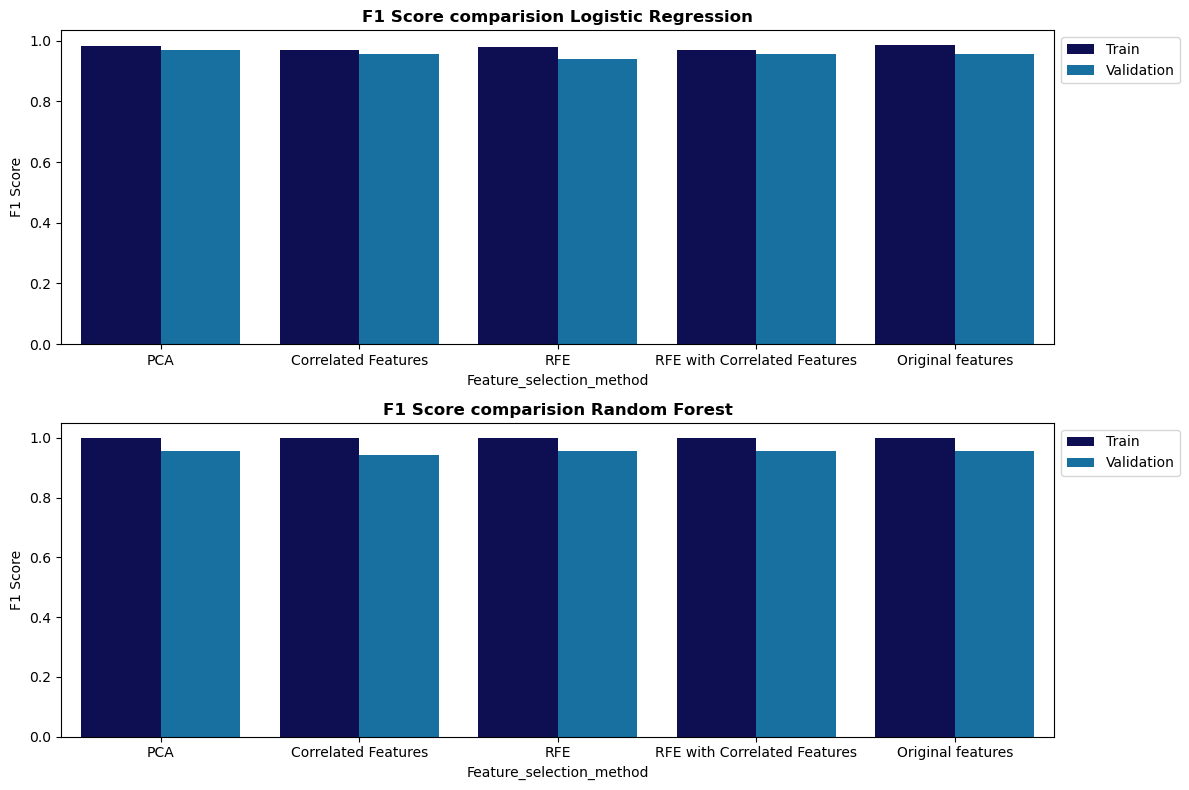

In [41]:
# Visualize the DataFrame
# Imoport packeags
import seaborn as sns
import matplotlib.pyplot as plt

# Slice the DataFrame 
results_df_log_reg = results_df[results_df['Classifier'] == 'Logistic Regression']
results_df_rg   = results_df[results_df['Classifier'] == 'Random Forest']


# Create the frame for the plots
fig, axs = plt.subplots(2, 1, figsize=(12,8))

# Define ccusom color palette 
custom_palette = ['#03045E', '#0077B6']



# Drow a plot of Logistic Regression
sns.barplot(data=results_df_log_reg, x='Feature_set', y='F1_Score', hue='Dataset', ax=axs[0], palette=custom_palette)
axs[0].set_title('F1 Score comparision Logistic Regression', fontweight='bold')
axs[0].set_xlabel('Feature_selection_method')
axs[0].set_ylabel('F1 Score')

# Second plot for Random Forest
sns.barplot(data=results_df_rg, x='Feature_set', y='F1_Score', hue='Dataset', ax=axs[1], palette=custom_palette)
axs[1].set_title('F1 Score comparision Random Forest', fontweight='bold')
axs[1].set_xlabel('Feature_selection_method')
axs[1].set_ylabel('F1 Score')

# Set the position of the legends
axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

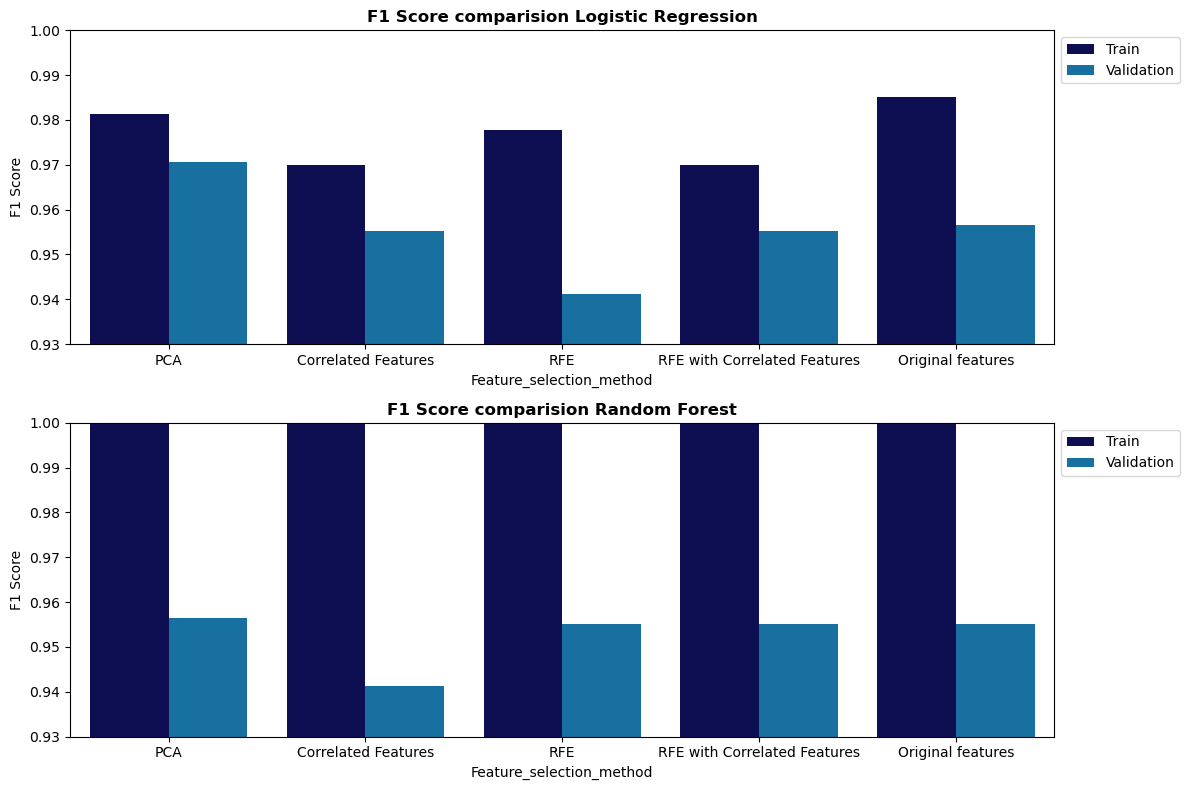

In [42]:
# Rewrite the plot to make the diffences more visible
# Create the frame for the plots
fig, axs = plt.subplots(2, 1, figsize=(12,8))

# Define ccusom color palette 
custom_palette = ['#03045E', '#0077B6']

# Drow a plot of Logistic Regression
sns.barplot(data=results_df_log_reg, x='Feature_set', y='F1_Score', hue='Dataset', ax=axs[0], palette=custom_palette)
axs[0].set_title('F1 Score comparision Logistic Regression', fontweight='bold')
axs[0].set_xlabel('Feature_selection_method')
axs[0].set_ylabel('F1 Score')

# Set y-axis limts to zoom in so that the diffences are more visible
axs[0].set_ylim(0.93, 1.00)

# Second plot for Random Forest
sns.barplot(data=results_df_rg, x='Feature_set', y='F1_Score', hue='Dataset', ax=axs[1], palette=custom_palette)
axs[1].set_title('F1 Score comparision Random Forest', fontweight='bold')
axs[1].set_xlabel('Feature_selection_method')
axs[1].set_ylabel('F1 Score')

# Set y-axis limts to zoom in so that the diffences are more visible
axs[1].set_ylim(0.93, 1.00)

# Set the position of the legends
axs[0].legend(bbox_to_anchor=(1, 1), loc='upper left')
axs[1].legend(bbox_to_anchor=(1, 1), loc='upper left')

plt.tight_layout()
plt.show()

1, I can use test set for 2 selected method.
2, overfitting with RF